In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [6]:
print(train_data.describe())
print(train_data.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

In [7]:
print(train_data[train_data.Age.isna()])

     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

In [8]:
#from sklearn.ensemble import RandomForestClassifier

#y = train_data["Survived"]

#features = ["Pclass","Sex", "SibSp", "Parch"]
#X = pd.get_dummies(train_data[features])
#X_test = pd.get_dummies(test_data[features])

#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model.fit(X,y)
#predictions = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

Ajout de nouvelles features au dataset : Feature Engineering

In [9]:
## Identification des noms de famille

name_df = train_data["Name"].str.split().str[0]
name_df_test = test_data["Name"].str.split().str[0]

doublons = name_df.value_counts()[lambda x: x > 1].index
name_df_doublons = train_data[name_df.isin(doublons)]

In [10]:
train_data["Nom de famille"] = name_df
test_data["Nom de famille"] = name_df_test

In [11]:
ex_doublon = train_data[train_data["Nom de famille"] == train_data["Nom de famille"].loc[0]]
print(ex_doublon)

     PassengerId  Survived  Pclass                       Name   Sex   Age  \
0              1         0       3    Braund, Mr. Owen Harris  male  22.0   
477          478         0       3  Braund, Mr. Lewis Richard  male  29.0   

     SibSp  Parch     Ticket    Fare Cabin Embarked Nom de famille  
0        1      0  A/5 21171  7.2500   NaN        S        Braund,  
477      1      0       3460  7.0458   NaN        S        Braund,  


In [12]:
## Gestion des valeurs manquantes des âges

# Première idée : gérer les familles où on connaît l'âge d'un autre membre et attribuer la moyenne pour les autres selon leur sexe
import random

def missing_values_age(data, complete_data, full_data):
    for index, row in data.iterrows():
        ind_nf = row["Nom de famille"]
        if row.SibSp > 0:
            data_related = complete_data.loc[(complete_data["Nom de famille"] == ind_nf) & (complete_data['SibSp'] == row.SibSp)]
            if not(data_related.empty):
                age_sib = data_related['Age'].item()
                full_data.at[index, 'Age'] = round(random.uniform(age_sib - 3, age_sib + 3))
            else:
                full_data.at[index, 'Age'] = round(np.mean(complete_data[complete_data.Sex == row.Sex]['Age']))
        elif row.Parch > 0:
            data_related = complete_data.loc[(complete_data["Nom de famille"] == ind_nf) & (complete_data['Parch'] == row.Parch)]
            if not(data_related.empty):
                age_parch = data_related['Age'].item()
                if age_parch < 21:
                    full_data.at[index, 'Age'] = round(random.uniform(age_parch + 26, age_parch + 32))
                elif age_parch > 30:
                    full_data.at[index, 'Age'] = round(random.uniform(age_parch - 29, age_parch - 25))
                else:
                    full_data.at[index, 'Age'] = round(np.mean(complete_data[complete_data.Sex == row.Sex]['Age']))
            else:
                full_data.at[index, 'Age'] = round(np.mean(complete_data[complete_data.Sex == row.Sex]['Age']))
        else:
            full_data.at[index, 'Age'] = round(np.mean(complete_data[complete_data.Sex == row.Sex]['Age']))

age_missing_df = train_data[train_data.Age.isna()]
age_notmissing_df = train_data[train_data.Age > 0]

missing_values_age(age_missing_df, age_notmissing_df, train_data)

age_missing_dftest = test_data[test_data.Age.isna()]
age_notmissing_dftest = test_data[test_data.Age > 0]

missing_values_age(age_missing_dftest, age_notmissing_dftest, test_data)

In [13]:
#from sklearn.ensemble import RandomForestClassifier

#y = train_data["Survived"]

#features = ["Pclass","Sex", "Age", "SibSp", "Parch"]
#X = pd.get_dummies(train_data[features])
#X_test = pd.get_dummies(test_data[features])

#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model.fit(X,y)
#predictions = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

Version en ajoutant le prix du ticket comme feature

In [14]:
def missing_values_fare(data):
    df_missingfare = data[data.Fare.isna()]
    df_notmissingfare = data[data.Fare > 0]

    for index, row in df_missingfare.iterrows():
        data.at[index, 'Fare'] = np.mean(df_notmissingfare[(df_notmissingfare.Pclass == row.Pclass) & (df_notmissingfare.Embarked == row.Embarked)].Fare)

missing_values_fare(train_data)
missing_values_fare(test_data)

In [15]:
#from sklearn.ensemble import RandomForestClassifier

#y = train_data["Survived"]

#features = ["Pclass","Sex", "Age", "Fare", "SibSp", "Parch"]
#X = pd.get_dummies(train_data[features])
#X_test = pd.get_dummies(test_data[features])

#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model.fit(X,y)
#predictions = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

Cross-validation(KFold)

In [16]:
#from sklearn.model_selection import train_test_split, cross_val_score, KFold
#from sklearn.ensemble import RandomForestClassifier

#y = train_data["Survived"]

#features = ["Pclass","Sex", "Age", "Fare", "SibSp", "Parch"]
#X = pd.get_dummies(train_data[features])
#X_test = pd.get_dummies(test_data[features])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

#kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)

#print("Scores de chaque fold :", cv_scores)
#print("Moyenne des scores :", cv_scores.mean())

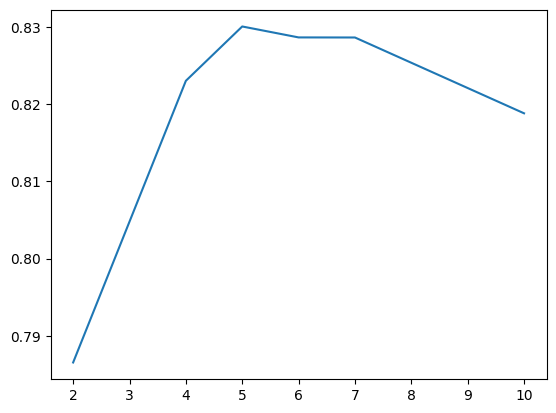

In [17]:
## Etude des scores selon la max_depth du modèle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

max_depths = [2,3,4,5,6,7,10]

cv_results = []

y = train_data["Survived"]

features = ["Pclass","Sex", "Age", "Fare", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for max_depth in max_depths:
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=1)

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)

    cv_results.append(cv_scores.mean())

plt.plot(max_depths, cv_results)
    
## MAX POUR 5

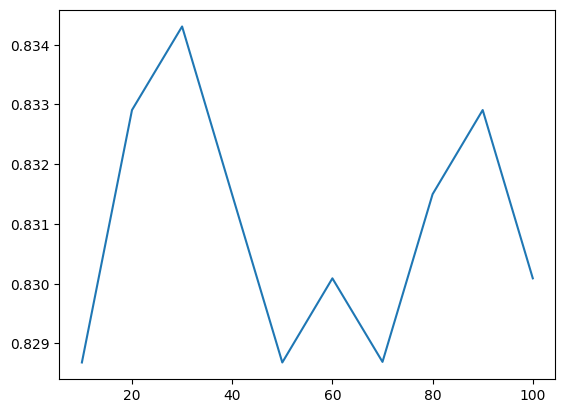

In [18]:
## Etude des scores selon le nombre d'estimateurs du modèle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

n_estimators_list = [10,20,30,40,50,60,70,80,90,100]

cv_results = []

y = train_data["Survived"]

features = ["Pclass","Sex", "Age", "Fare", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=5, random_state=1)

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)

    cv_results.append(cv_scores.mean())

plt.plot(n_estimators_list, cv_results)
    
## MAX POUR 30

Test avec les paramètres optimisés

In [19]:
#y = train_data["Survived"]

#features = ["Pclass","Sex", "Age", "Fare", "SibSp", "Parch"]
#X = pd.get_dummies(train_data[features])
#X_test = pd.get_dummies(test_data[features])

#model = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=1)
#model.fit(X,y)
#predictions = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

# MOINS BON QUE L'ANCIENNE VERSION MDRRRR !!!

### Gros feature engineering (inspiré d'un tuto)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore")

SEED = 42

In [21]:
def concat_df(train_data, test_data):
    # Retourne un df training + test concaténé
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Retourne deux dfs d'entraînement et de test
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = "Training Set"
df_test.name = "Test Set"
df_all.name = "All Set"

dfs =[df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples= {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples= 418

Training X Shape = (891, 12)
Training y Shape = 891
Test X Shape = (418, 11)
Test y Shape = 418
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Missing Values

In [22]:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




##### Valeurs d'âge manquantes

On a choisi la médiane des valeurs d'âge en triant par sexe et par classe car c'était les deux variables qui avaient la plus grande corrélation avec l'âge.

In [23]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass'])['Age'].median()

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


##### Valeurs manquantes sur la variable Embarked

In [24]:
# Les deux passagères qui n'ont pas de valeurs EMbarked ont en réalité embarqué à Southampton
df_all['Embarked'] = df_all['Embarked'].fillna('S')

##### Valeur manquante sur le prix du ticket

In [25]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

df_all['Fare'] = df_all['Fare'].fillna(med_fare)

##### Valeurs manquantes sur la cabine

Les cabines A, B et C étaient réservés aux passagers en 1ère classe.

Les cabines D et E pour toutes les classes.

Les cabines F et G pour les passagers en 2ème et 3ème classe.

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1
            0          1           2
A  100.000000   0.000000    0.000000
B  100.000000   0.000000    0.000000
C  100.000000   0.000000    0.000000
D   86.956522  13.043478    0.000000
E   82.926829   9.756098    7.317073
F    0.000000  61.904762   38.095238
G    0.000000   0.000000  100.000000
M    6.607495  25.049310   68.343195
T  100.000000   0.000000    0.000000


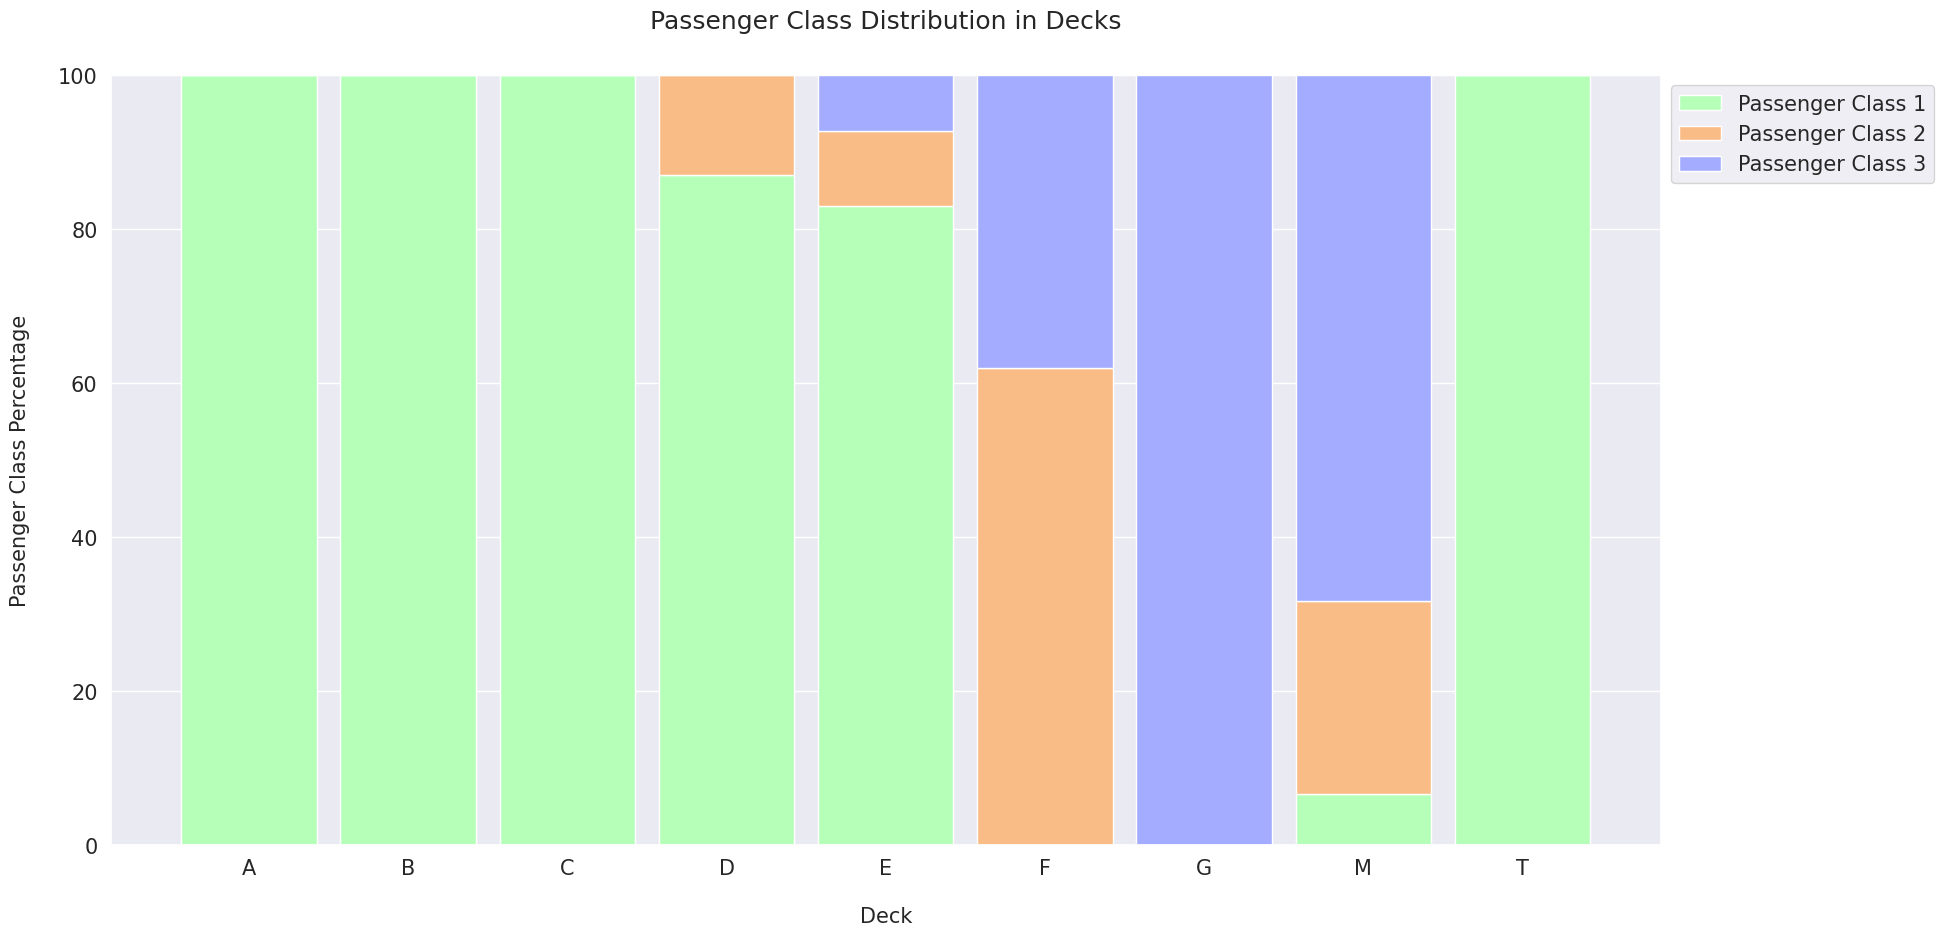

In [26]:
# On crée la colonne Deck avec la première lettre de la cabine (M pour Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

print(df_all_decks.head())

def get_pclass_dist(df):

    # On crée un dictionnaire pour chaque lettre de cabine
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]

    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count
            except KeyError:
                deck_counts[deck][pclass] = 0

    df_decks = pd.DataFrame(deck_counts)

    deck_percentages = {}

    # On crée un dictionnaire pour chaque pourcentage de gens dans chaque deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]

    return deck_counts, deck_percentages

def display_pclass_dist(percentages):

    df_percentages = pd.DataFrame(percentages).transpose()
    print(df_percentages)
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85

    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]

    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)

    plt.show()

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

Comme il n'y a qu'un passager en cabine T, on le change en cabine A.

In [27]:
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

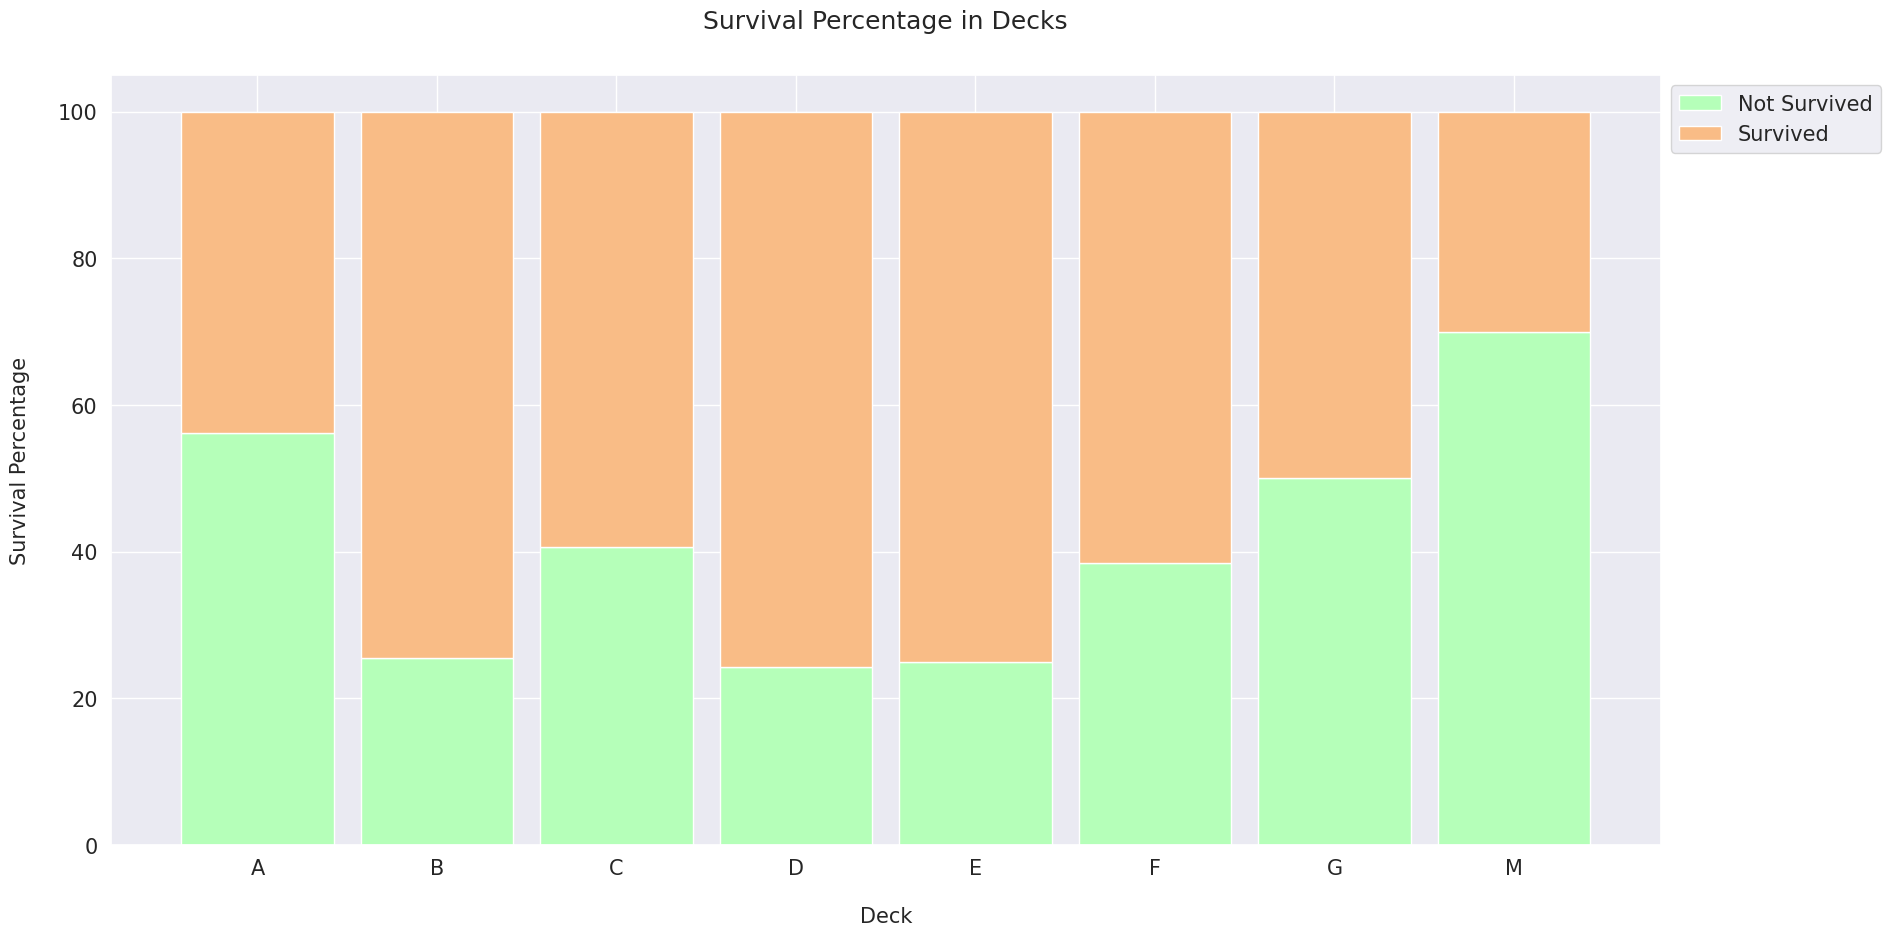

In [28]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_survived_dist(df):

    surv_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}}
    decks = df.columns.levels[0]

    for deck in decks:
        for survive in range(2):
            surv_counts[deck][survive] = df[deck][survive][0]

    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]

    return surv_counts, surv_percentages

def display_surv_dist(percentages):

    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]

    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label='Not Survived')
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label='Survived')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)

    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

Conclusion de cet affichage : le taux de survie n'est pas le même selon la cabine de chaque passager, cela montre bien que cette variable a une influence.

Les cabines B, D et E ont un taux de survie plus élevé tandis que les passagers manquants (M) ont le taux de survie le plus bas.

Les cabines utilisées par les passagers en première classe ont un taux de survie plus élevé que les autres. On va donc regrouper les decks A, B et C sur une même variable ABC, les decks D et E sur une variable DE, les decks F et G sur une variable FG et les M.

In [29]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()


Deck
M      1014
ABC     182
DE       87
FG       26
Name: count, dtype: int64

In [30]:
df_all.drop(['Cabin'], inplace=True, axis=1)

df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

for df in dfs:
    display_missing(df)

Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0


Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0




##### Distribution Survécu / Pas survécu